# MFE 230P: ASSIGNMENT III
**GROUP NAME:** [Group Name Here]

Student ID | Name
:--- | :---
[Group Member 1 ID Here] | [Group Member 1 Name Here]
[Group Member 2 ID Here] | [Group Member 2 Name Here]
[Group Member 3 ID Here] | [Group Member 3 Name Here]
[Group Member 4 ID Here] | [Group Member 4 Name Here]

# 1. Feature Engineering & Kernalization

### A. Feature Design

Executing the cell below will create a pandas dataframe `data` containing 2015-16 daily adjusted percent returns for the top 99 US companies by market cap (as of 31 December 2016).

In [87]:
import numpy as np
import pandas as pd
import time
import cvxpy as cvx
import matplotlib.pyplot as plt
import scipy.stats as sp

In [ ]:
import pandas as pd

data = pd.read_csv(
    'top_99_returns.csv',
    header=0,
    index_col=0
)

data.head()

Engineer a few features (5-10) that, in your judgement, would be effective in characterizing the daily equity returns of each company. For example, $\left|\frac{\max}{\min}\right|$ return or average squared return—be creative and use your instincts. Then, project the asset returns `data` into to this new feature space by creating a new matrix `data_fe` where each row represents a feature you engineered and each column represents a company. (Note that, unlike in previous assignments, the columns now represent observations while the rows represent features.)

Center and scale each row of `data` and `data_fe` (you may design your own center and scaling protocol or stick with simple mean and standard deviation). Intuitively ration why we perform this standardization.

### SOLUTION.

_Your solution here._

### B. Visualize Data

Project data to 2D space using a method your choice so that the data can be visualized. Two recommended options include [Multi-Dimensional Scaling](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html) or [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).

You do not need to understand what these lower-dimensional embedding algorithms do, just apply them and then plot the data in 2D. When displaying the points in 2D, plot the ticker of each company rather than a point so that the tickers are laid out on the 2D Cartesian plan. Do this for both `data` and `data_fe`.

How does the raw data approach compare to your feature-mapping? Are the companies displayed in a way that respects your feature mapping? Briefly comment.

### SOLUTION.

_Your solution here._

In [ ]:
import sklearn.manifold as manifold
import matplotlib.pyplot as plt

In [ ]:
def plot_low_dim(data, title="title"):
    mds = manifold.MDS()
    data2 = mds.fit_transform(data.T)
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    ax.scatter(data2[:,0], data2[:,1])
    ax.set_title(title)
    labels = data.columns
    for label, x, y in zip(labels, data2[:, 0], data2[:, 1]):
        ax.annotate(label, xy=(x, y))
    plt.show()

In [ ]:
plot_low_dim(data, "2D visualization of original data")

### C. Kernelized Feature Space

Create two square kernel matrices `kernel` and `kernel_fe` by applying a Gaussian kernel transformation to both the raw returns in `data` as well as their projection into your feature space, represented in `data_fe`. Then, use PCA to make a 10-dimensional approximation of the kernel matrix before continuing with MDS, t-SNE, or some other choice of low-dimensional embedding method to further reduce everything to 2D cooridnates. Then, plot the results.

You will need to play with $\gamma$ parameter defining the Gaussian kernel to get results that look interesting. Compare the two plots as you did in the previous part.

### SOLUTION.

_Your solution here._

### D. Interpreting the Results

In light of the previous analysis, what are the advantages and disadvantages of using engineered features in place of the raw data? What role does kernalization play? Briefly comment.

### SOLUTION.

_Your solution here._

# 2. Least Squares and LAD

### A. LAD Regression is a Linear Program

Show that LAD regression can be written as a linear program. What does this mean computationally as compared to the equivalent problem in which $\ell_1$ replaced with $\ell_2$?

### SOLUTION.

_Your solution here._

### B. Adaptive Index Quantiles with Least Squares

Executing the cell below will create a pandas dataframe `X` containing 2014-16 daily adjusted percent returns for the top (roughly) 500 US companies by market cap (as of 31 December 2016) and another pandas dataframe `y` containing daily adjusted returns for the `SPY` ETF over the same period, which tracks the S&P 500 index closely.

In [17]:
X = pd.read_csv(
    'top_500_returns.csv',
    header=0,
    index_col=0
)

y = pd.read_csv(
    'spy.csv',
    header=0,
    index_col=0
)

X.index = pd.to_datetime(X.index, format='%Y%m%d')
y.index = pd.to_datetime(y.index, format='%Y%m%d')

In [20]:
X.head()

,ORCL,MSFT,TROW,HON,LLTC,ADM,FISV,CERN,MKL,WPZ,...,JNK,WCN,AVGO,BUD,PAM,VRSK,CVE,DG,VCSH,TSLA
date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,-0.010977,-0.006683,-0.014444,-0.011492,-0.014709,-0.009447,-0.014395,-0.012020,-0.009649,-0.002359,...,-0.000740,-0.012377,-0.004331,-0.027334,-0.011450,-0.009130,-0.012216,0.014589,-0.001003,-0.002187
2014-01-03,-0.005814,-0.006728,0.008963,0.002214,0.002228,0.004652,-0.002749,-0.006719,0.004193,-0.002190,...,0.000740,0.002321,0.003799,0.001835,0.054054,0.000153,-0.005654,-0.003595,0.000376,-0.003598
2014-01-06,-0.003987,-0.021132,-0.001561,-0.000994,-0.004669,0.002084,0.001206,-0.009141,-0.001143,0.007500,...,0.001972,-0.003691,-0.006812,-0.011567,-0.043956,-0.022724,-0.013149,-0.022466,0.000878,-0.017117
2014-01-07,0.010141,0.007750,0.008417,0.004092,0.001787,-0.009935,0.004991,0.019557,-0.005204,0.000000,...,0.000123,0.013612,0.009602,0.018919,0.001916,-0.000628,0.002161,0.004697,0.000376,0.016054
2014-01-08,-0.003435,-0.017852,0.000596,-0.003965,0.007358,-0.011435,0.005308,-0.017010,-0.002720,-0.002804,...,-0.000123,-0.000841,0.014832,0.004307,0.001912,-0.003930,-0.008983,-0.003172,-0.001002,0.012855


Tranform the data to log returns. Then, split the data into training and validation sets, where the first 60% of dates constitute the former.  Using only `cvxpy` and `numpy`, perform [least-norm regression](https://see.stanford.edu/materials/lsoeldsee263/08-min-norm.pdf) on the training set, regressing `SPY`'s return on the lagged returns of the top 500 companies:

$$\min_{\theta} \|\theta\|_2 \text{ subject to } y_t = X_{t-1}\theta$$

Plot your model's predictions on the training and validation set _cumulative returns_ along with a historgram of your model's residuals on the validation set. Breifly comment on what you see. Does the residual distribution appear to be Gaussian? Check your hypothesis using a statistical test such as [Shapiro-Wilks](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.shapiro.html).

One way to forecast the 1-step-ahead 95th percentile of index returns for `SPY` using lagged returns of the top 500 companies is to follow steps similar to those outlined in [this stack exchange post](https://stats.stackexchange.com/questions/147242/how-to-calculate-the-prediction-interval-for-an-ols-multiple-regression). Comment on the potential effectiveness of this method in light of the out-of-sample residual distribution you previously analyzed.

### SOLUTION.

_Your solution here._

In [106]:
X_lret = np.log(1+X)
y_lret = np.log(1+y)
train_num = int(X.shape[0] * 0.6)

Xtrain = X_lret[0:train_num]
ytrain = y_lret[0:train_num]
Xtest = X_lret[train_num:]
ytest = y_lret[train_num:]

In [107]:
X_lret.head()

,ORCL,MSFT,TROW,HON,LLTC,ADM,FISV,CERN,MKL,WPZ,...,JNK,WCN,AVGO,BUD,PAM,VRSK,CVE,DG,VCSH,TSLA
date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,-0.011038,-0.006705,-0.014549,-0.011559,-0.014818,-0.009492,-0.014500,-0.012093,-0.009696,-0.002362,...,-0.000740,-0.012454,-0.004340,-0.027715,-0.011516,-0.009172,-0.012291,0.014484,-0.001004,-0.002189
2014-01-03,-0.005831,-0.006751,0.008923,0.002212,0.002226,0.004641,-0.002753,-0.006742,0.004184,-0.002192,...,0.000740,0.002318,0.003792,0.001833,0.052644,0.000153,-0.005670,-0.003601,0.000376,-0.003604
2014-01-06,-0.003995,-0.021358,-0.001562,-0.000994,-0.004680,0.002082,0.001205,-0.009183,-0.001144,0.007472,...,0.001970,-0.003698,-0.006835,-0.011634,-0.044951,-0.022986,-0.013236,-0.022722,0.000878,-0.017265
2014-01-07,0.010090,0.007720,0.008382,0.004084,0.001785,-0.009985,0.004979,0.019368,-0.005218,0.000000,...,0.000123,0.013520,0.009556,0.018742,0.001914,-0.000628,0.002159,0.004686,0.000376,0.015926
2014-01-08,-0.003441,-0.018013,0.000596,-0.003973,0.007331,-0.011501,0.005294,-0.017156,-0.002724,-0.002808,...,-0.000123,-0.000841,0.014723,0.004298,0.001910,-0.003938,-0.009024,-0.003177,-0.001003,0.012773


In [176]:
def get_LN_pred(X, Y, theta):
    X = X[:-1].as_matrix()
    Y = Y.shift(-1)[:-1].as_matrix()
    Y_hat = np.dot(X,theta)
    err = Y - Y_hat
    ret_val = [X, Y, Y_hat, err]
    return ret_val

def get_least_norm(Xtrain, ytrain, Xtest, ytest):
    X = Xtrain[:-1].as_matrix()
    Y = ytrain.shift(-1)[:-1].as_matrix()
    theta = cvx.Variable(X.shape[1])
    obj = cvx.Minimize(cvx.norm(theta))
    constr = []
    
    for i in range(0, X.shape[0]):
        constr.append((0 <= Y[i] - X[i,:] * theta))
        constr.append((0 >= Y[i] - X[i,:] * theta))
    
    problem = cvx.Problem(obj, constraints=constr)
    res = problem.solve()
    opt_theta = theta.value
    #print(opt_theta)
    train_vals = get_LN_pred(Xtrain, ytrain, opt_theta)
    test_vals = get_LN_pred(Xtest, ytest, opt_theta)
    return (opt_theta, train_vals, test_vals)

def plot_cmlt_ret(ret, xvar, ax=None, label='Label', cmlt_flag=True):
    if ax:
        ax = ax
    else:
        fig, ax = plt.subplots(1,1, figsize=(10,6))
    
    cmlt_ret = np.zeros(len(ret))
    cmlt_ret[0] = ret[0]
    for i in range(1, ret.shape[0]):
        cmlt_ret[i] = cmlt_ret[i-1] + ret[i] if cmlt_flag else ret[i]
    
    ax.plot(xvar, cmlt_ret, label=label)

def plot_returns(theta, train_vals, test_vals, cmlt_flag=True, combined_plot=True, labl="", save_fig=False):
    label_str = "(Cumulative)" if cmlt_flag else "(Daily)"
    label_str = label_str + labl
    df_train = pd.DataFrame(np.array(train_vals[1:4])[:,:,0].T, index=ytrain.index[:-1], columns=['Y','Y_hat','err'])
    df_test = pd.DataFrame(np.array(test_vals[1:4])[:,:,0].T, index=ytest.index[:-1], columns=['Y','Y_hat','err'])
    df_full = pd.concat([df_train, df_test])
    
    fig, axes = plt.subplots(1,2, figsize=(15,7))
    plot_cmlt_ret(train_vals[2], ytrain.index[:-1], ax=axes[0], label="Predicted returns"+label_str, cmlt_flag=cmlt_flag)
    plot_cmlt_ret(train_vals[1], ytrain.index[:-1], ax=axes[0], label="Actual returns"+label_str, cmlt_flag=cmlt_flag)
    axes[0].set_title("Training set")
    axes[0].set_xlabel("Time")
    axes[0].set_ylabel("Log returns")
    axes[0].legend(loc="upper right")

    plot_cmlt_ret(test_vals[2], ytest.index[:-1], ax=axes[1], label="Predicted returns"+label_str, cmlt_flag=cmlt_flag)
    plot_cmlt_ret(test_vals[1], ytest.index[:-1], ax=axes[1], label="Actual returns"+label_str, cmlt_flag=cmlt_flag)
    axes[1].set_title("Validation set")
    axes[1].set_xlabel("Time")
    axes[1].set_ylabel("Log returns")
    axes[1].legend(loc="upper right")

    plt.show()
    if save_fig:
        fig.savefig("plot-1"+labl+".jpg")
    
    if combined_plot:
        fig, axes = plt.subplots(1,1, figsize=(15,7))
        plot_cmlt_ret(df_full['Y'], df_full.index, ax=axes, label="Actual returns"+label_str, cmlt_flag=cmlt_flag)
        plot_cmlt_ret(df_full['Y_hat'], df_full.index, ax=axes, label="Predicted returns"+label_str, cmlt_flag=cmlt_flag)
        axes.set_title("Combined plot - training & validation set")
        axes.set_xlabel("Time")
        axes.set_ylabel("Log returns")
        axes.legend(loc="upper right")
        plt.show()
        if save_fig:
            fig.savefig("plot-2"+labl+".jpg")

In [153]:
theta, train_vals, test_vals = get_least_norm(Xtrain, ytrain, Xtest, ytest)    

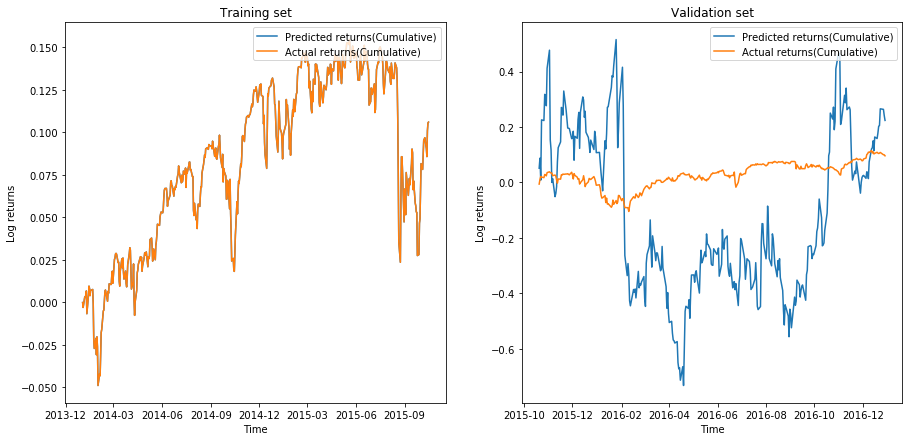

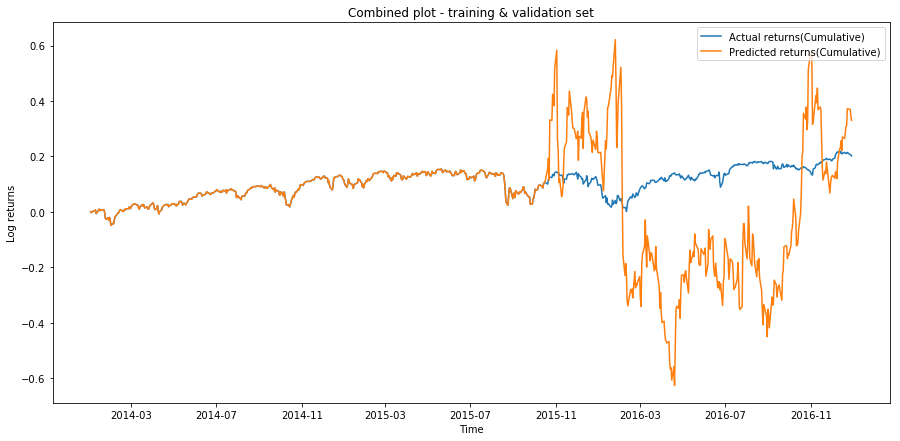

In [154]:
plot_returns(theta, train_vals, test_vals, cmlt_flag=True, combined_plot=True)

We can see that in the fitted training data, the predicted and actual log returns are exactly matching (i.e. until November 2015 in the graph). We expect this behaviour since our optimization constraint is exact matching of log returns. From then in the test data, the predicted returns are extremely bad as we can see in the plot after Nov-2015.

The p-value for normality test is 0.00000


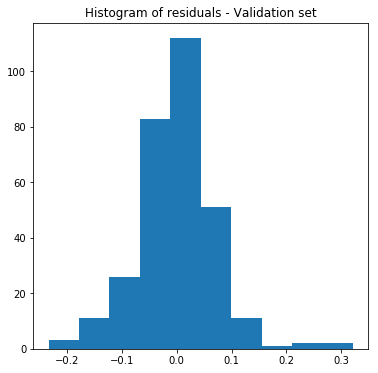

In [89]:
sw_test = sp.shapiro(test_vals[3])
print("The p-value for normality test is %0.5f" %sw_test[1])
fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.hist(test_vals[3])
axes.set_title("Histogram of residuals - Validation set")
plt.show()

We can see from the p-value above that residuals in the validation set are not normally distributed. We can also see from the histogram that the distribution does not appear to be Gaussian.

## TODO - 95%le estimator

In [119]:
s_sq = np.mean(np.power(train_vals[3],2))
s_sq

2.4562385454474284e-23

### C. Adaptive Index Quantiles with LAD

Perform quantile regression on the training set to estimate the 1-step-ahead 90th percentile of the `SPY`. Use the setting `solver=CBC` when calling the `.solve()` method in `cvxpy` **if you can** (this is not a requirement, but will significantly speed up compute time). How does this model perform on the validation set? Plot the daily returns of `SPY` on the training and validation sets with the forcasted $90^{th}$ percentile superimposed.

Speculate about how this model would perform in practice compared to the least squares model in the previous part.

### SOLUTION.

_Your solution here._

In [160]:
def quantiles_fit(Xtrain, ytrain, Xtest, ytest, q=0.9, lamb=1.0, L2_penalty=False):
    X = Xtrain[:-1].as_matrix()
    Y = ytrain.shift(-1)[:-1].as_matrix()
    theta = cvx.Variable(X.shape[1])
    
    obj_val = 0.0
    
    for i in range(0, X.shape[0]):
        e = X[i,:] * theta - Y[i]
        obj_val = obj_val + cvx.max_elemwise(q*e, (q-1.0)*e) #get_quantile(q, e)
    
    if L2_penalty:
        obj_val += lamb * cvx.sum_squares(theta)
    else:
        obj_val += lamb * cvx.norm(theta)
    obj = cvx.Minimize(obj_val)
    problem = cvx.Problem(obj)
    res = problem.solve()
    opt_theta = theta.value
    
    train_vals = get_LN_pred(Xtrain, ytrain, opt_theta)
    test_vals = get_LN_pred(Xtest, ytest, opt_theta)
    return (opt_theta, train_vals, test_vals)

In [156]:
theta, train_vals, test_vals = quantiles_fit(Xtrain, ytrain, Xtest, ytest)

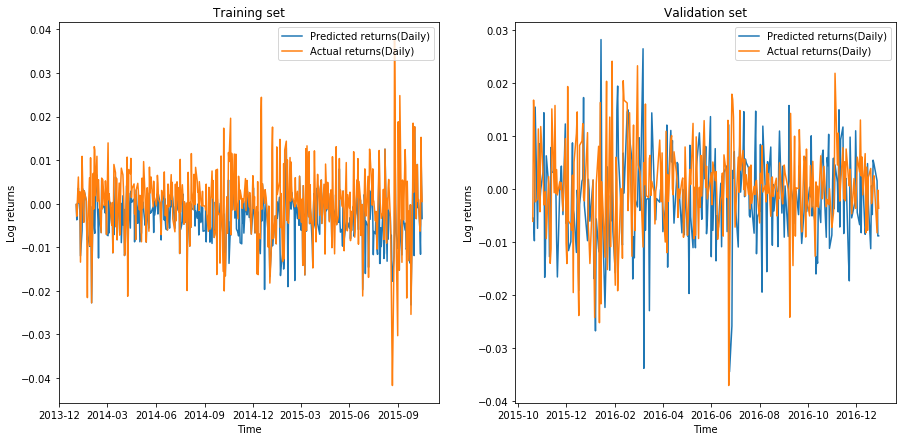

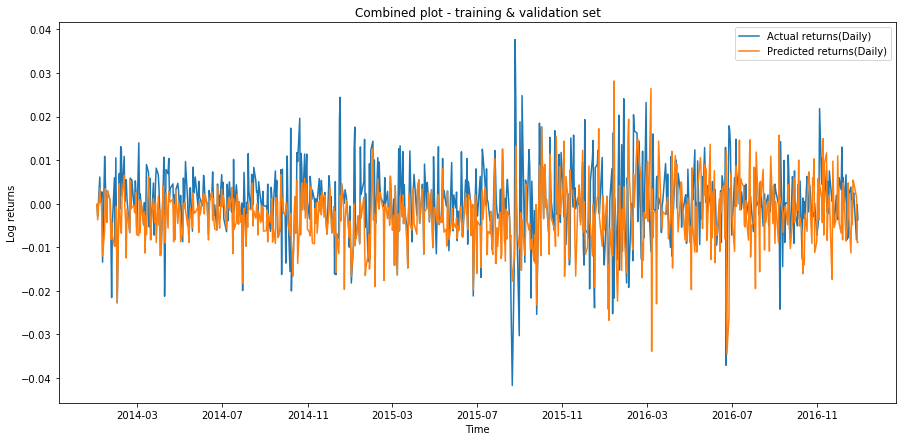

In [157]:
plot_returns(theta, train_vals, test_vals, cmlt_flag=False, combined_plot=True)

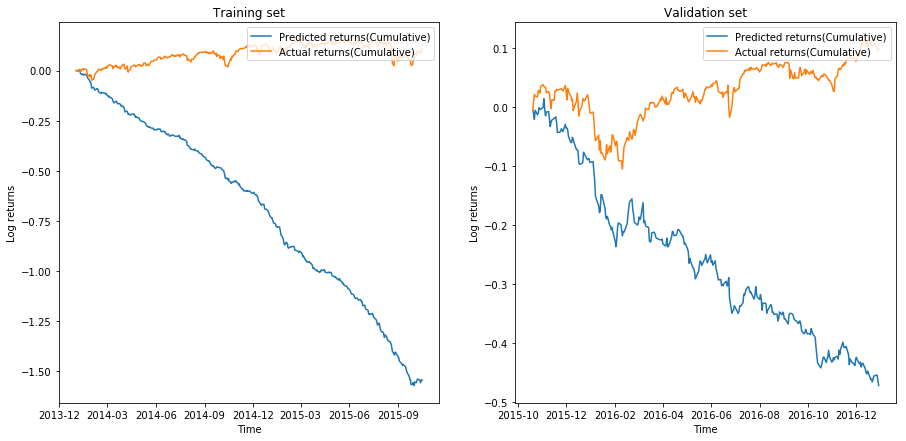

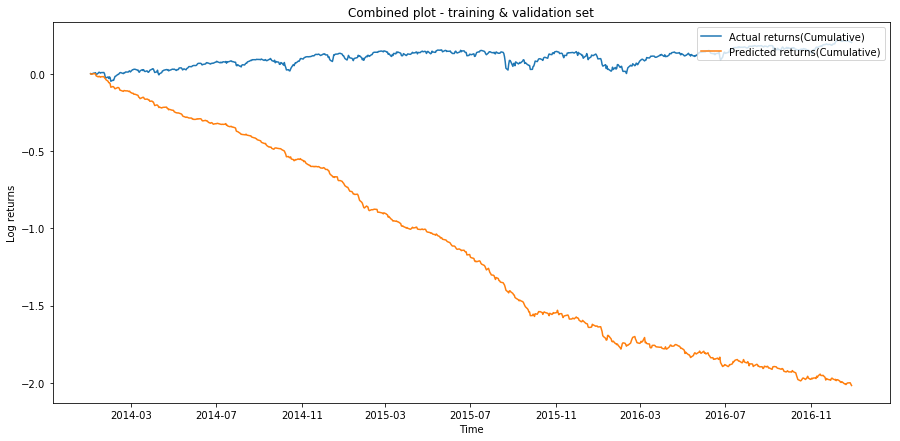

In [159]:
plot_returns(theta, train_vals, test_vals, cmlt_flag=True, combined_plot=True)

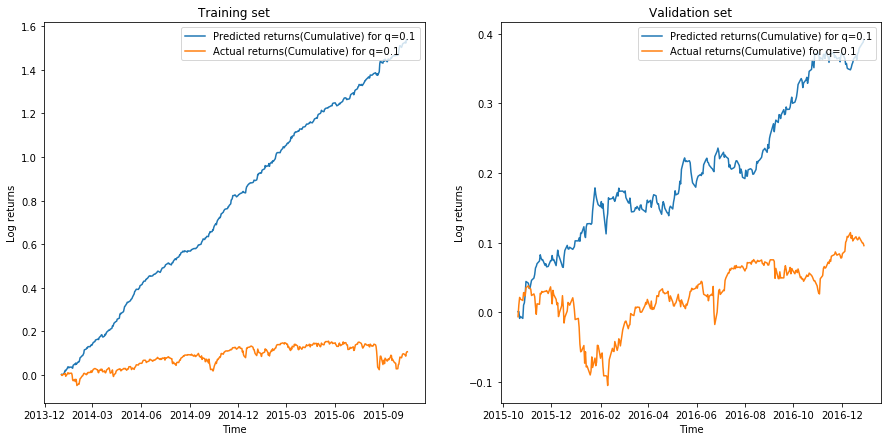

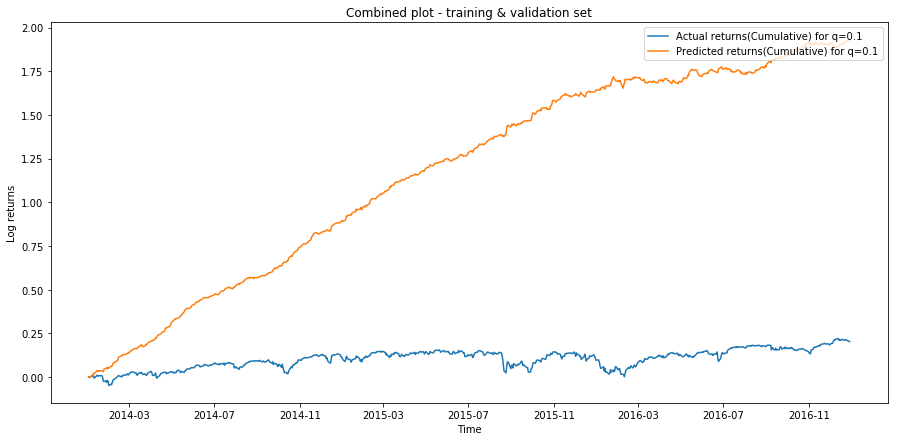

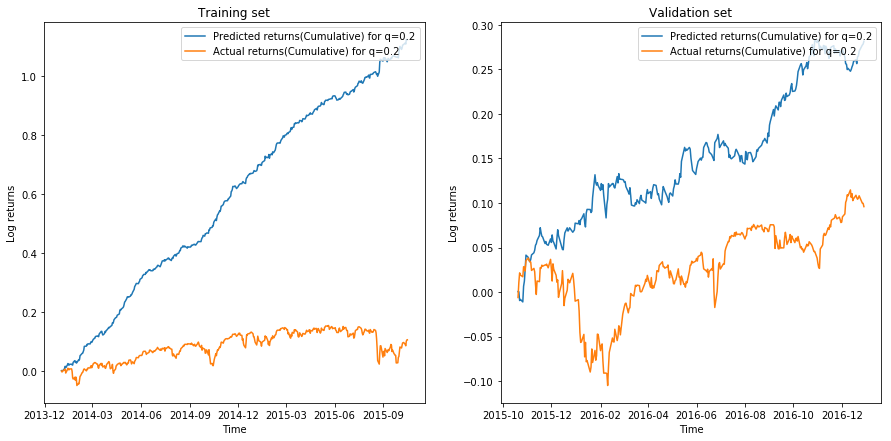

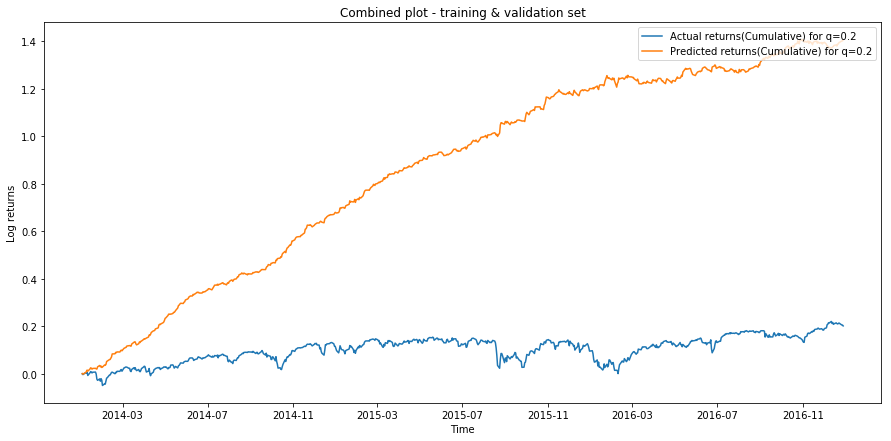

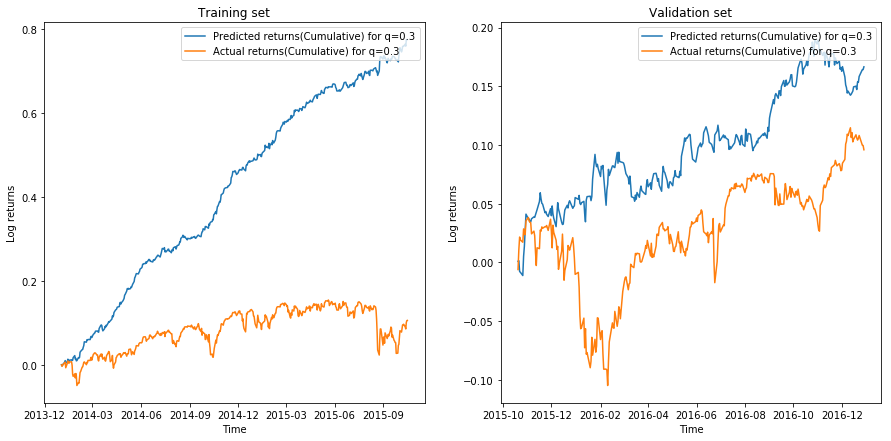

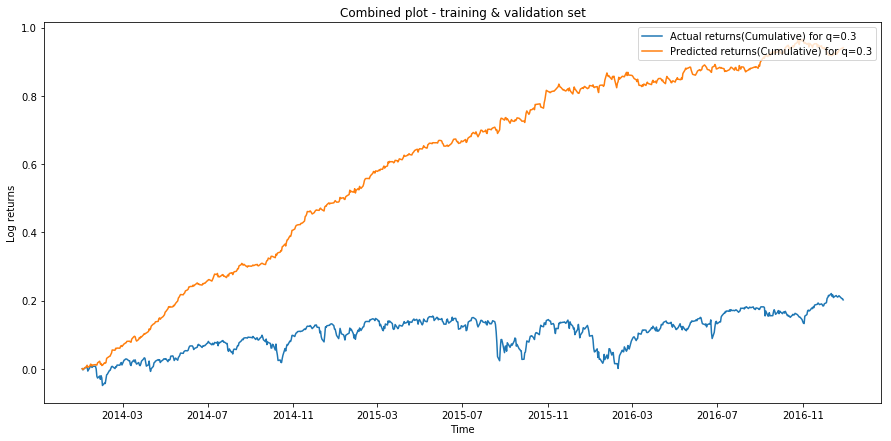

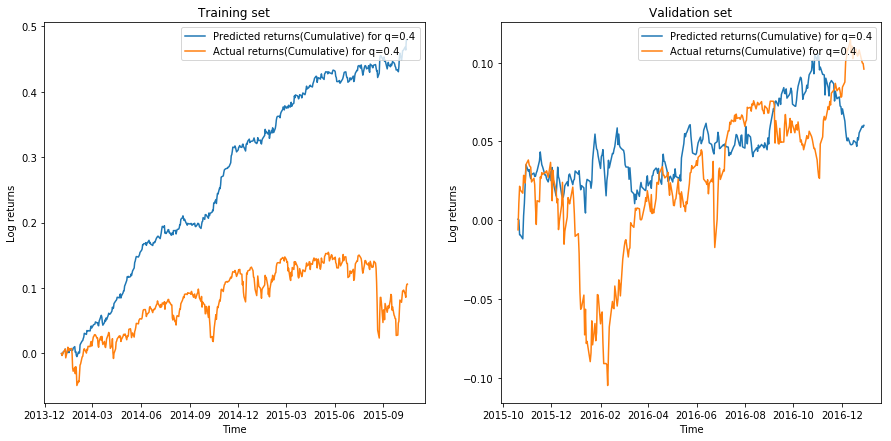

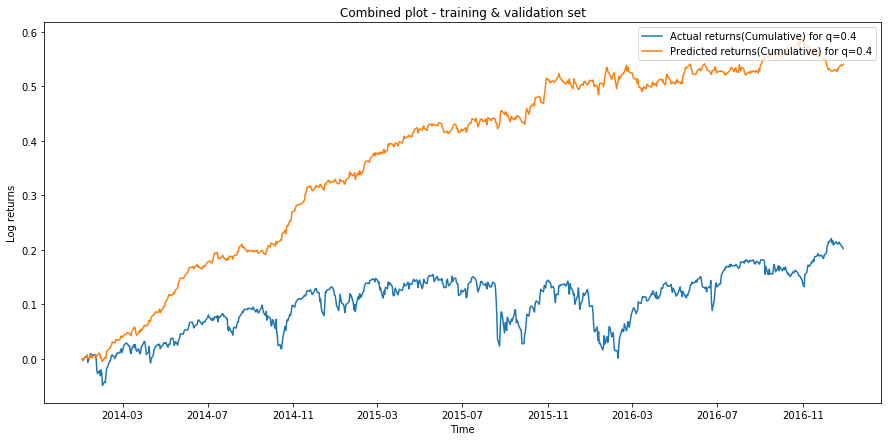

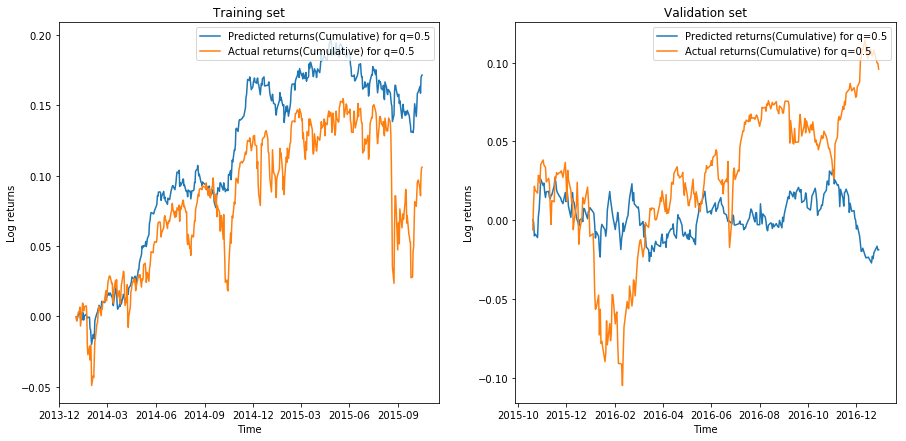

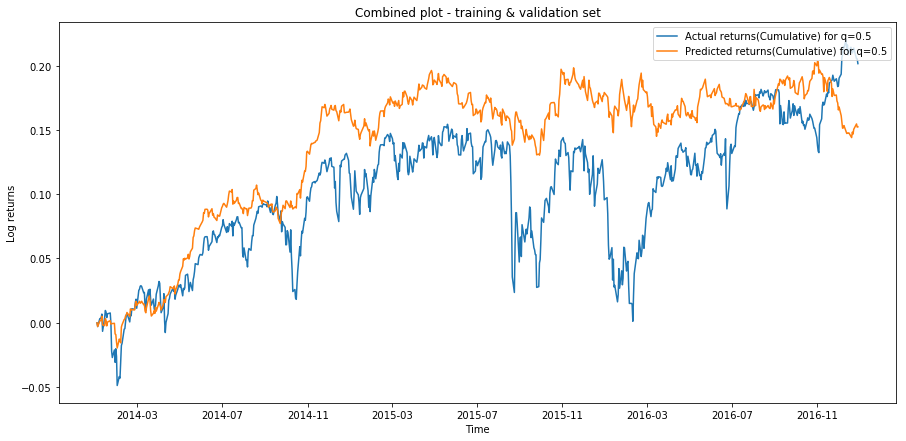

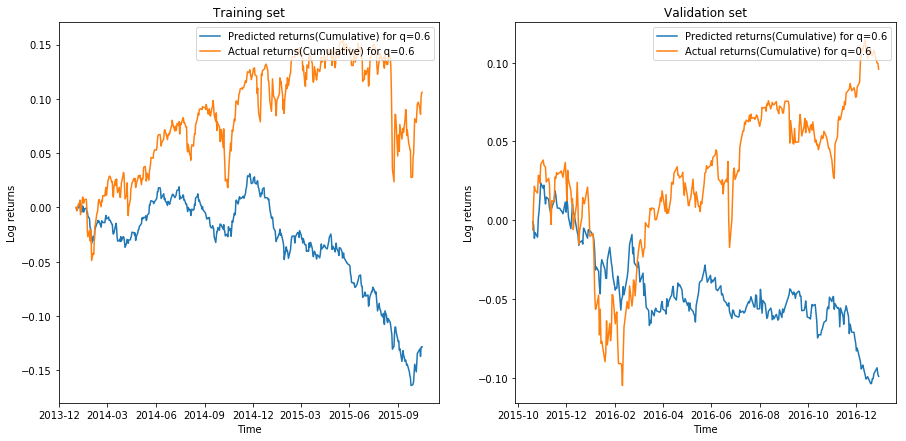

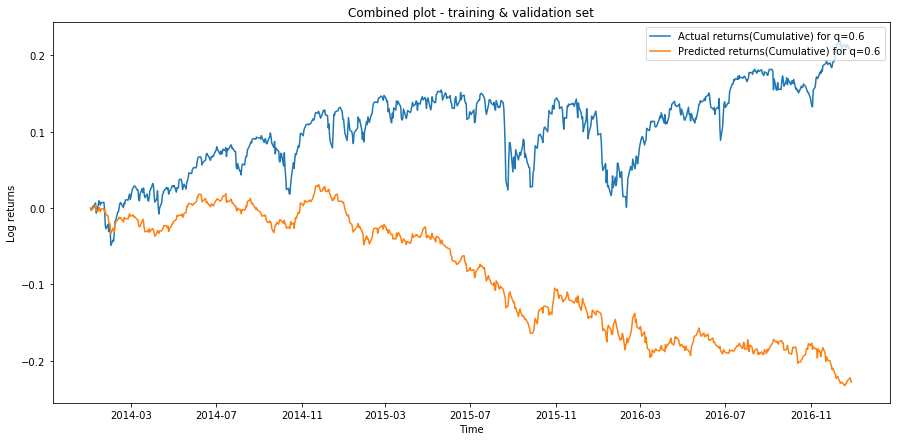

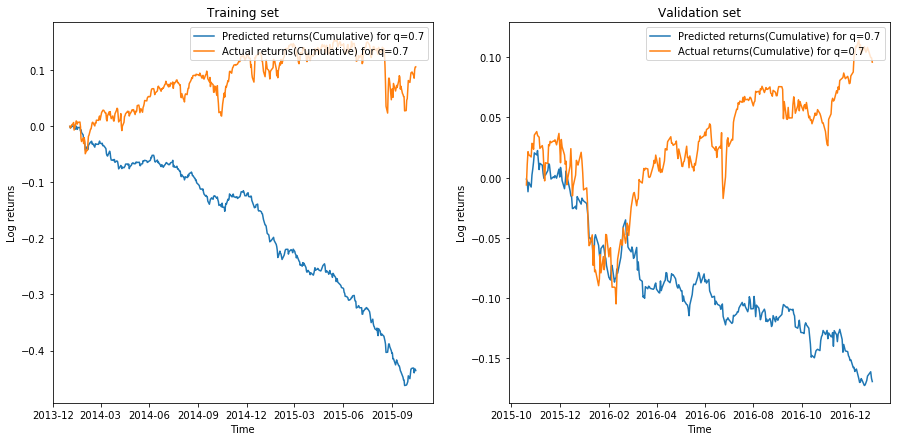

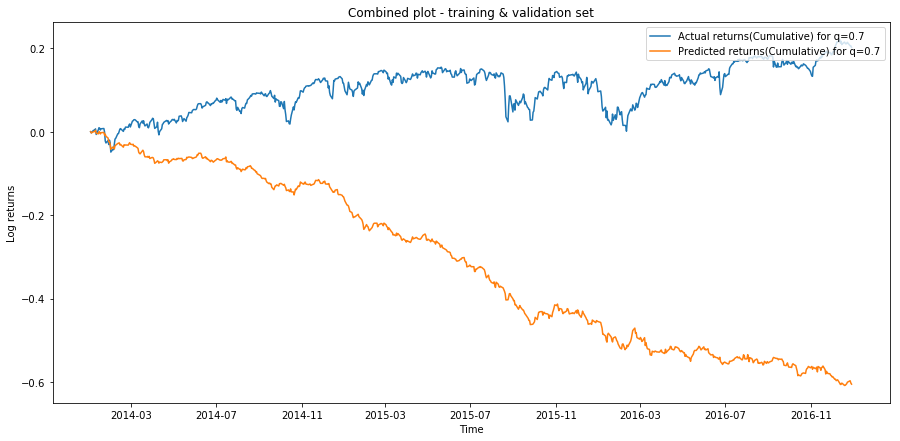

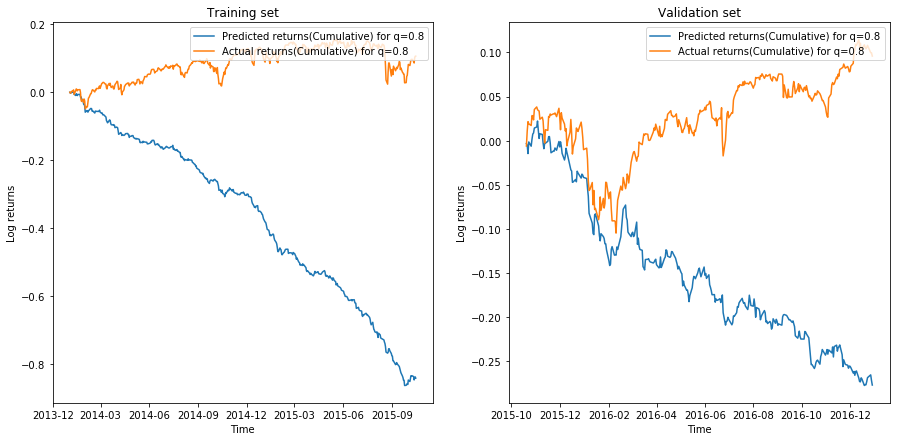

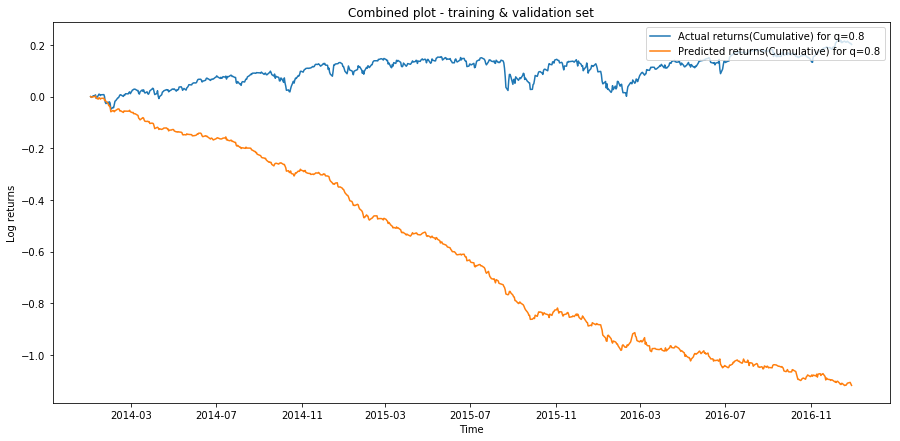

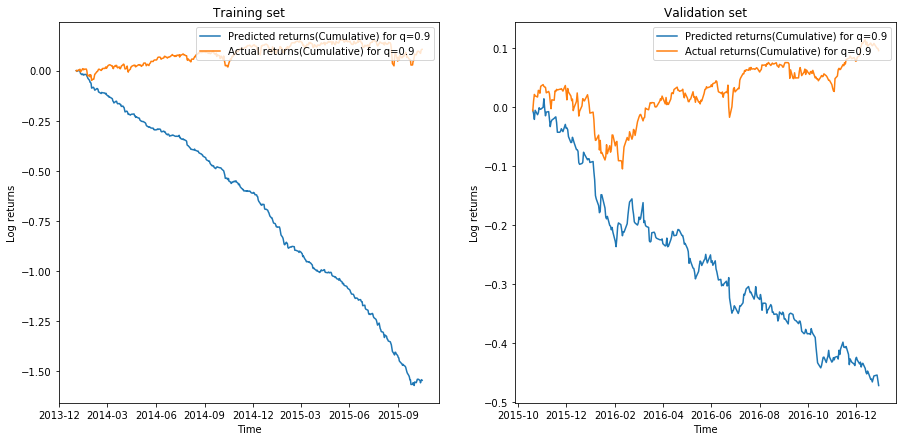

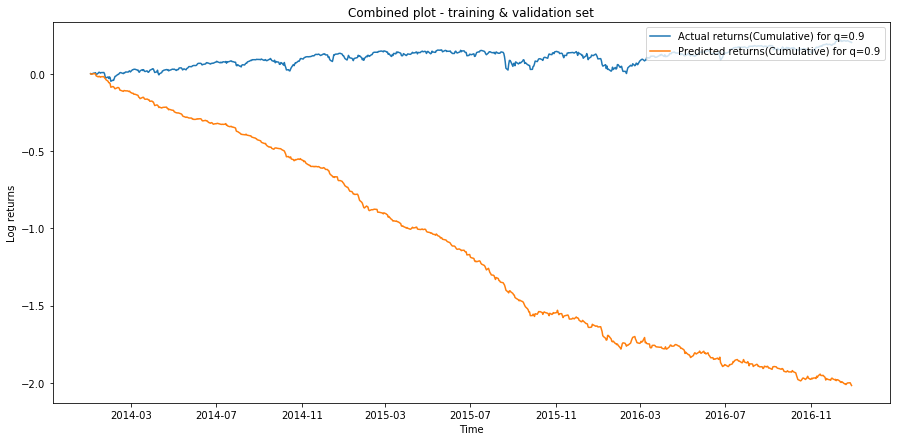

In [178]:
q_arr = [0.1*i for i in range(1,10)]
for q in q_arr:
    labl = " for q="+str(q)
    theta, train_vals, test_vals = quantiles_fit(Xtrain, ytrain, Xtest, ytest, q=q, lamb=1.0)
    #plot_returns(theta, train_vals, test_vals, cmlt_flag=False, combined_plot=True)
    plot_returns(theta, train_vals, test_vals, cmlt_flag=True, combined_plot=True,labl=labl, save_fig=True)

### D. Adaptive Index Quantiles with Ridged LAD

Repeat the previous exercise, but with an $\ell_2$ penalty on the vector of regression coefficients $\theta$:

$$\theta_\lambda = \arg\min_{\theta} \|y_t - X_{t-1}\theta\|_1 + \lambda \|\theta\|_2^2$$

Tune the $\ell_2$ penalty parameter $\lambda$ using the validation set to obtain the optimal penalty $\lambda^\star$. (Make sure to think about what defines the optimal model.)

How is the vector of regression coefficients $\theta_{\lambda^\star}$ different from $\theta_0$? How can you interpret this different coefficient weighting from an investing viewpoint? How does this model compare, on the validation set, to the model in the previous part? Finally, how do you think this model would compare to autoregressive volatility forecasting models such as GARCH? Explain.

### SOLUTION.

_Your solution here._

In [161]:
theta, train_vals, test_vals = quantiles_fit(Xtrain, ytrain, Xtest, ytest, L2_penalty=True)

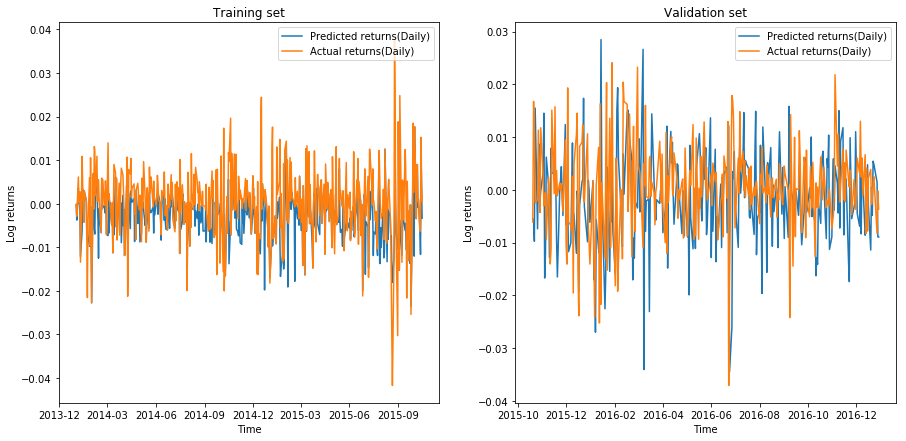

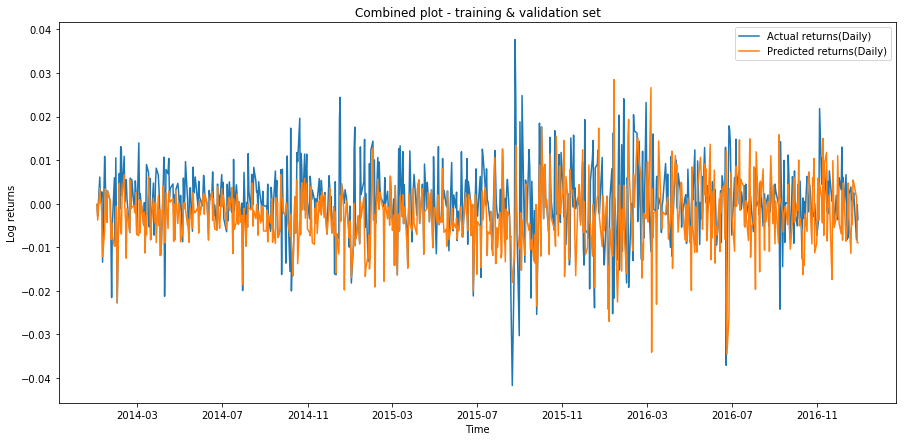

In [162]:
plot_returns(theta, train_vals, test_vals, cmlt_flag=False, combined_plot=True)

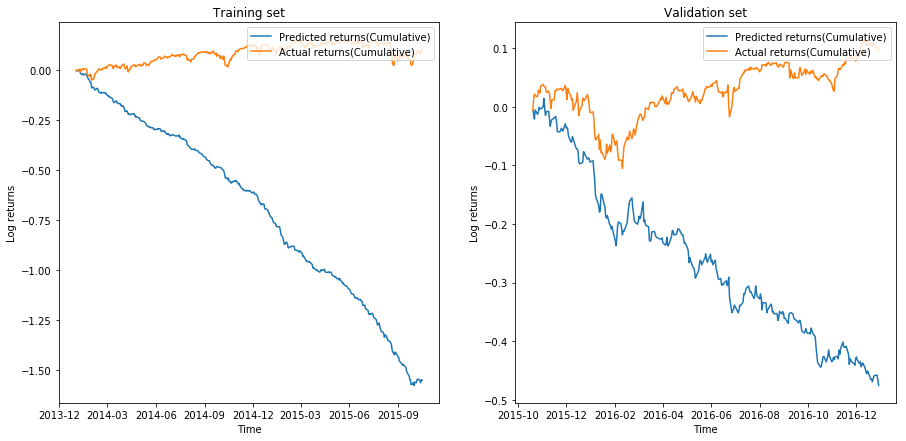

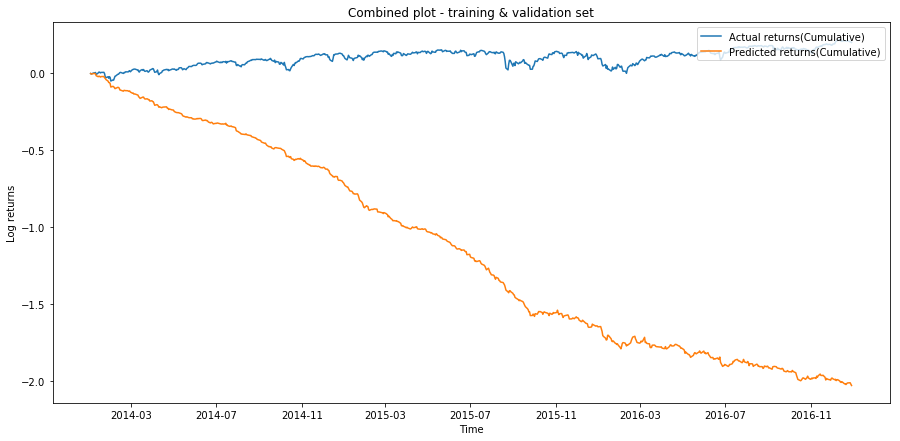

In [163]:
plot_returns(theta, train_vals, test_vals, cmlt_flag=True, combined_plot=True)

# 3. Support Vector Machine

In this question, we consider an application of SVM in text classification for volatility prediction. Executing the following cell will load a $1470 \times 971$ `numpy` array into a variable `features` where each row corresponds to a published article and each column corresponds to the frequency of a keyword that appears in the article (i.e. our archive contains $1470$ articles and our dictionary contains $971$ keywords). Each article is about a certain company. Binary labels will also be imported as a $1470 \times 1$  `numpy` array `labels`. An article's label is $+1$ if the article caused an immediate and significant change (positive or negative) to the company's stock price. Otherwise, the label is $-1$. The data has been divided into a training set (`Xtrain` and `ytrain`), which will be used to train you SVM, and a validation set (`Xtest` and `ytest`) which will be used to test the SVM's prediction accuracy.

In [ ]:
features = np.loadtxt('news/features.csv', delimiter=',') # load data here
labels = np.loadtxt('news/labels.csv', delimiter=',') # load data here

Xtrain = features[:-106]
ytrain = labels[:-106]

Xtest = features[-106:]
ytest = labels[-106:]

### A. $\ell_2$ SVM

The ridged-SVM classification problem can be formulated as the following optimization problem:

$$\underset{w, b}{\text{min }} \frac{1}{2}\left\|w\right\|_2^2 + C\sum_{i=1}^{1470}{\left(1 - y_i\left(w^\top x_i + b\right)\right)_+}$$

where $y_i$ denotes the $i^{th}$ label, $x_i$ denotes the $i^{th}$ vector of word frequencies in the articles, $w$ is the weights or vector of coefficients, $b$ is the offset or intercept, and $C$ is a model parameter is inversely related to the ridge regularization of the weights vector $w$. This is a quadratic optimization problem.

Using `cvxpy`, implement this SVM (estimate the $w$ and $b$ parameters) on the training set and tune the parameter $C$ from $0$ to $100$ by checking classification accuracy on the validation set. Plot the training accuracy versus $C$ curve and validation accuracy versus $C$ curve. Briefly comment on the results.

### SOLUTION.

In [ ]:
import cvxpy as cvx
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def get_SVM_params(X, Y, C, L1_norm = False):
    dims = X.shape[1]
    w = cvx.Variable(dims)
    b = cvx.Variable(1)
    obj_val = 0

    for i in range(0, X.shape[0]):
        obj_val = obj_val + cvx.pos(1.0 - Y[i]*(X[i,:]*w+b))

    obj_val = obj_val * C
    w_penalty = cvx.norm(w,1) if L1_norm else 0.5*cvx.sum_squares(w)
    obj_val = obj_val + w_penalty
    obj_func = cvx.Minimize(obj_val)
    problem = cvx.Problem(obj_func)
    res = problem.solve()
    return (w.value, b.value)

def predict_SVM(X, Y, w, b):
    y_val = X*w + b
    y_hat = np.zeros((y_val.shape[0], y_val.shape[1]))
    y_hat[y_val >= 0] = 1
    y_hat[y_val < 0] = -1
    err = Y - y_hat[:,0]
    err_pcnt = 1.0*len(err[err != 0])/len(err)
    return (err, Y, err_pcnt)

def svm_main(Xtr, Ytr, Xtest, Ytest, C=np.array([]), step=5, L1_norm=False):
    start_time = time.time()
    c_end = 10.0
    step=step
    C_arr = C if C.any() else np.array([1.0*i for i in np.arange(0, c_end,step)])
    train_err = np.zeros(len(C_arr))
    test_err = np.zeros(len(C_arr))
    w_arr = np.zeros((len(C_arr), Xtr.shape[1]))
    b_arr = np.zeros(len(C_arr))
    
    for i in range(0,len(C_arr)):
        w, b = get_SVM_params(Xtr, Ytr, C_arr[i], L1_norm = L1_norm)
        train_err[i] = 100.0*predict_SVM(Xtr, Ytr, w, b)[2]
        test_err[i] = 100.0*predict_SVM(Xtest, Ytest, w, b)[2]
        w_arr[i] = np.array(w)[:,0]
        b_arr[i] = b
    
    print("--- Run time: %s seconds ---" % (time.time() - start_time))
    return (C_arr, train_err, test_err, w_arr, b_arr)

def plot_error(C, train, test):
    fig, ax = plt.subplots(1,1, figsize=(10,6))
    ax.plot(C, train, label="Training set error")
    ax.plot(C, test, label="Test set error")
    ax.set_xlabel("Value of C")
    ax.set_ylabel("Error percent")
    ax.legend(loc="upper right")

In [ ]:
c1_arr = np.arange(0,155,5.0)
c1, train_e1, test_e1, w1_arr, b1_arr = svm_main(Xtrain, ytrain, Xtest, ytest, C=c1_arr)

In [ ]:
plot_error(c1, train_e1, test_e1)

In [ ]:
min_err_1 = np.argmin(test_e1)
print("The minimum error occured at C=%d, error=%0.3f%%" %(c1[min_err_1], test_e1[min_err_1]))
print("Hence we can use the optimal value of C as C=%d on our validation set" %c1[min_err_1])

We can see from the plots above that training error always decreases but test/validation error doesn't. After a certain value of C, validation error starts to increase. We can observe that the minimum is attained for C=95 and C=100.

### B. Feature Selection by Magnitude

We want to find the keywords that are most important for classification. Consider the following approach: Fix $C=10$ and perform SVM to estimate $w$ on the training set. Sort elements of $w$ by their absolute value in descending order, choose a the top $k$, and then perform SVM on this subset of the features. What are some advantages or disadvantages you anticipate in approaching feature selection in this manner?

Try $k\in \{10, 20, 30, \dots, 190, 200\}$ and evaluate classification accuracy on the validation set. Comment on the result.

### SOLUTION.

In [ ]:
def select_top_k(w, k, Xtrain):
    w_arr = np.array(w)[:,0]
    top_k_idx = np.argpartition(w_arr, -k)[-k:]
    top_k_X = Xtrain[:,top_k_idx]
    return top_k_X

In [ ]:
w1, b1 = get_SVM_params(Xtrain, ytrain, 10.0)

In [ ]:
start_time = time.time()
k_end = 210
k_arr = np.arange(10, k_end, 10)
k_train_err = np.zeros(len(k_arr))
k_test_err = np.zeros(len(k_arr))

for i in range(0,len(k_arr)):
    top_k_Xtrain = select_top_k(w1, k_arr[i], Xtrain)
    top_k_Xtest = select_top_k(w1, k_arr[i], Xtest)
    w, b = get_SVM_params(top_k_Xtrain, ytrain, 10.0)
    k_train_err[i] = 100.0*predict_SVM(top_k_Xtrain, ytrain, w, b)[2]
    k_test_err[i] = 100.0*predict_SVM(top_k_Xtest, ytest, w, b)[2]

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(k_arr, k_train_err, label="Training set error")
ax.plot(k_arr, k_test_err, label="Test set error")
ax.set_xlabel("Value of K")
ax.set_ylabel("Error percent")
ax.legend(loc="upper right")
print("--- Run time: %s seconds ---" % (time.time() - start_time))

If we select features based on magnitude of ${w_i}$ of that feature for a given penatly
## TODO

We can see from the plot that test set accuracy reached a minimum for a small value of k (around k = 20). We can infer that using just 20 words, we can predict the stock moves with up to 80% accuracy. We get almost the same accuracy even if we use ~75 word set. This is a pretty good result as we can build a strategy by monitoring just these 20 words in the news and place bets on stocks using our predicton algorithm.

### C. $\ell_1$ SVM

Consider a different approach for feature selection: Subsitute the $\ell_2$-norm penalty with an $\ell_1$-norm penalty in the SVM objective:

$$\underset{w, b}{\text{min }} \left\|w\right\|_1 + C\sum_{i=1}^{1470}{\left(1 - y_i\left(w^\top x_i + b\right)\right)_+}$$

How might this approach compare to the previous feature-selection approach suggested in part B above?

Sweep the parameter $C$ in the interval $[0, 100]$ and plot the number of non-zero elements in $w$ versus the prameter $C$. Note that due to `cvxpy`'s limited numerical precision, zero elements are not exactly $0$. So the criterion for non-zero element is $|w_i| > 10^{-6}$. Perform a similar plot of validation set accuracy versus the parameter $C$. Comment on the results.

### SOLUTION.

In [ ]:
c3_arr = np.arange(0,105,5.0)

In [ ]:
c3, train_e3, test_e3, w3_arr, b_arr = svm_main(Xtrain, ytrain, Xtest, ytest, C=c3_arr, L1_norm=True)

In [ ]:
w_non_zero_idx = np.abs(w3_arr) > 10e-6
w_non_zero = np.sum(w_non_zero_idx, axis=1)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(c3, train_e3, 'b-', label="Training set error")
ax.plot(c3, test_e3, 'r-', label="Test set error")
ax2 = ax.twinx()
ax2.plot(c3, w_non_zero, 'g-', label="# of non zero W's")
ax.set_xlabel("Value of C")
ax.set_ylabel("Error percent")
ax2.set_ylabel("# of Non-zero ${w_i}$ 's")
ax.legend(loc="upper right")
ax2.legend(loc="right")

Compared to part-B, using L1 norm will make more elements of w zero rather than lot of small elements in w. So we should observe that as C increases, number of non-zero elements in w should increase.

We can observe that as C=0, all the elements on w are all zero since the objective function depends only on L1 norm of w (as L1 norm encourages sparsity). But as C increases, the emphasis shifts to penatly on wrong predictions and some elements of w are non-zero. As C increases beyond 20 we can see that the entire emphasis is on the penatly for wrong predictions and number of non-zero ${w_i}'s$ have saturated at around 475. This makes sense as it does not make sense to optimize non zero ${w_i}$ anymore.